This guided project uses a database called Chinook that contains information for a fictitious online music-selling service. <br>Its tables track artists, albums and tracks as well as customers and invoices.

Schema:

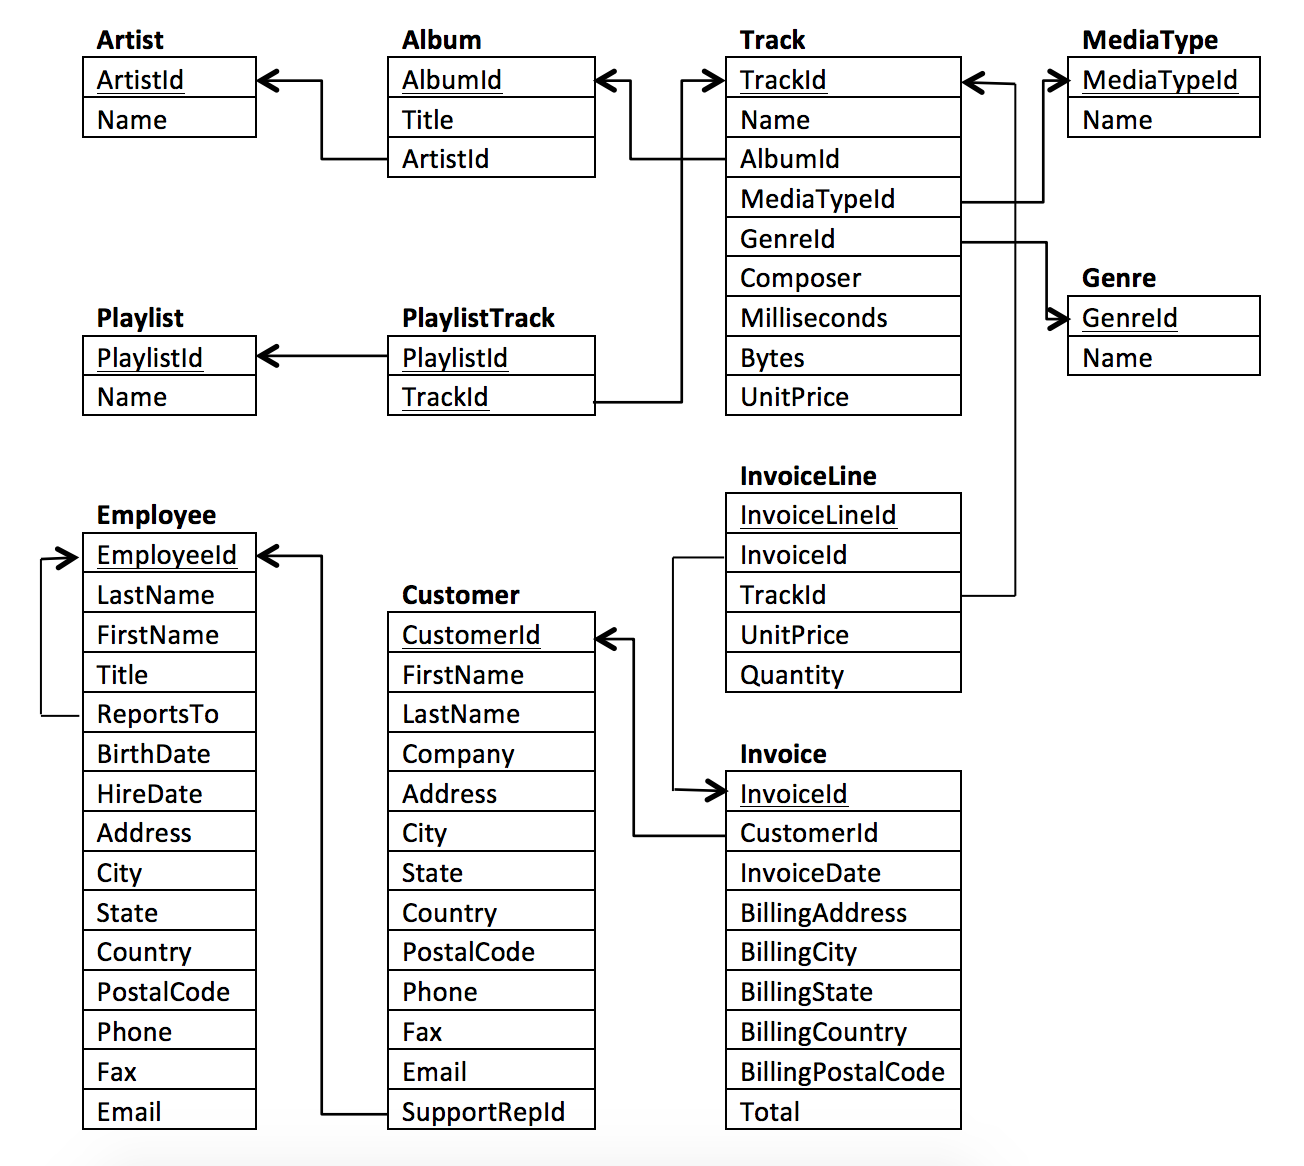

In [2]:
%%capture
%load_ext sql
%sql sqlite:///Datasets/chinook.db

<h1>Overview of the Data</h1>
Here we see all the tables in the database.

In [3]:
%%sql
SELECT
    name as table_name,
    type
FROM sqlite_master
WHERE type IN ("table","view");

 * sqlite:///Datasets/chinook.db
Done.


table_name,type
album,table
artist,table
customer,table
employee,table
genre,table
invoice,table
invoice_line,table
media_type,table
playlist,table
playlist_track,table


Q: List albums written by Queen and U2

In [4]:
%%sql
SELECT 
    a.name,
    al.title 
FROM album al
    JOIN artist a
ON a.artist_id=al.artist_id
WHERE a.name='Queen' or a.name='U2';

 * sqlite:///Datasets/chinook.db
Done.


name,title
Queen,Greatest Hits II
Queen,Greatest Hits I
Queen,News Of The World
U2,Achtung Baby
U2,All That You Can't Leave Behind
U2,B-Sides 1980-1990
U2,How To Dismantle An Atomic Bomb
U2,Pop
U2,Rattle And Hum
U2,The Best Of 1980-1990


In [5]:
%%sql
SELECT * 
FROM invoice_line
limit 2;

 * sqlite:///Datasets/chinook.db
Done.


invoice_line_id,invoice_id,track_id,unit_price,quantity
1,1,1158,0.99,1
2,1,1159,0.99,1


return latest invoice date

In [6]:
%%sql
SELECT * 
FROM invoice
ORDER BY 3 desc
LIMIT 1;

 * sqlite:///Datasets/chinook.db
Done.


invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total
614,53,2020-12-30 00:00:00,113 Lupus St,London,None,United Kingdom,SW1V 3EN,12.87


List top 5 Composers by most songs in our dataset.


In [7]:
%%sql
SELECT * 
FROM genre;

 * sqlite:///Datasets/chinook.db
Done.


genre_id,name
1,Rock
2,Jazz
3,Metal
4,Alternative & Punk
5,Rock And Roll
6,Blues
7,Latin
8,Reggae
9,Pop
10,Soundtrack


By genre which 5 Composers wrote the most songs in our dataset?

In [8]:
%%sql

WITH CTE as(
SELECT
     ROW_NUMBER () OVER ( PARTITION BY g.name
        ORDER BY count(*)
    desc ) rank,
 composer, 
    count(*) song_count,
    g.name genre_type
FROM 
    track t
JOIN 
    genre g
    ON t.genre_id=g.genre_Id AND composer IS NOT NULL
GROUP BY 
composer,
genre_type
ORDER BY count(*) DESC)


SELECT * FROM CTE WHERE rank=1
LIMIT 10;

 * sqlite:///Datasets/chinook.db
Done.


rank,composer,song_count,genre_type
1,U2,44,Rock
1,Steve Harris,36,Metal
1,Billy Corgan,31,Alternative & Punk
1,Miles Davis,23,Jazz
1,Chico Science,23,Latin
1,Chris Robinson/Rich Robinson,18,Blues
1,"Brian Eno, Bono, Adam Clayton, The Edge & Larry Mullen Jnr.",14,Soundtrack
1,João Suplicy,14,World
1,Chris Cornell,13,Alternative
1,Steve Harris,13,Heavy Metal


<h1>Countries with most invoices</h1>
<br>Query uses the invoice table to return the country and invoice count. This determines the the top 5 countries by invoice.

In [9]:
%%sql
SELECT 
    billing_country,
    COUNT(*)AS invoices 
FROM invoice 
GROUP BY billing_country 
ORDER BY invoices DESC
LIMIT 5;

 * sqlite:///Datasets/chinook.db
Done.


billing_country,invoices
USA,131
Canada,76
Brazil,61
France,50
Germany,41


<h1>Return both the city name and the sum of all invoice totals, to find the cities which generated the most money.</h1>

In [10]:
%%sql
SELECT 
       billing_city,
       CAST(SUM(Total)AS INT)  AS invoice_dollars 
FROM invoice 
GROUP BY billing_city 
ORDER BY invoice_dollars DESC
LIMIT 5;

 * sqlite:///Datasets/chinook.db
Done.


billing_city,invoice_dollars
Prague,273
Mountain View,169
London,166
Berlin,158
Paris,151


In [11]:
%%sql
SELECT * 
FROM customer
limit 1;

 * sqlite:///Datasets/chinook.db
Done.


customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id
1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3


<h1>Link the invoice and customer tables, to return the top five customers' names and emails by total spent.</h1>


In [12]:
%%sql
SELECT 
    country,
    first_name || " " || last_name customer,
    email,
    CAST(SUM(Total)AS INT) AS total 
FROM invoice i
    JOIN customer c on i.customer_id = c.customer_id
GROUP BY i.customer_id 
ORDER BY total DESC 
LIMIT 5;

 * sqlite:///Datasets/chinook.db
Done.


country,customer,email,total
Czech Republic,František Wichterlová,frantisekw@jetbrains.com,144
Czech Republic,Helena Holý,hholy@gmail.com,128
Ireland,Hugh O'Reilly,hughoreilly@apple.ie,114
India,Manoj Pareek,manoj.pareek@rediff.com,111
Brazil,Luís Gonçalves,luisg@embraer.com.br,108


<h1>Return Rock music listeners' emails ordered alphabetically and deal with duplicate email addresses so no one receives multiple emails.</h1>

In [13]:
%%sql
SELECT DISTINCT
    C.email     email,
    G.name      genre
  FROM Customer C 
    JOIN invoice I 
    ON C.customer_id = I.customer_id 
    JOIN invoice_line IL 
    ON I.invoice_id = IL.invoice_id 
    JOIN track T 
    ON IL.track_id = T.track_id 
    JOIN genre G 
    ON T.genre_id = G.genre_id 
 WHERE G.name = "Rock" 
    ORDER BY C.email
    LIMIT 10;

 * sqlite:///Datasets/chinook.db
Done.


email,genre
aaronmitchell@yahoo.ca,Rock
alero@uol.com.br,Rock
astrid.gruber@apple.at,Rock
bjorn.hansen@yahoo.no,Rock
camille.bernard@yahoo.fr,Rock
daan_peeters@apple.be,Rock
diego.gutierrez@yahoo.ar,Rock
dmiller@comcast.com,Rock
dominiquelefebvre@gmail.com,Rock
edfrancis@yachoo.ca,Rock


<h1>Find the artists who have written the most rock music in our dataset.</h1>

Done by returning the artist name and total track count of the top 10 rock bands.

In [14]:
%%sql
SELECT * 
FROM album
LIMIT 2;

 * sqlite:///Datasets/chinook.db
Done.


album_id,title,artist_id
1,For Those About To Rock We Salute You,1
2,Balls to the Wall,2


In [15]:
%%sql
SELECT * 
FROM artist
LIMIT 2;

 * sqlite:///Datasets/chinook.db
Done.


artist_id,name
1,AC/DC
2,Accept


In [16]:
%%sql
SELECT 
        a.name        artist_name,
        COUNT(track.name)  music_tracks 
FROM artist a 
        JOIN album 
        ON album.artist_id = a.artist_id 
        JOIN track 
        ON album.album_id = track.album_id 
        JOIN genre 
        ON track.genre_id = genre.genre_id 
WHERE genre.Name = 'Rock' 
GROUP BY 
        a.artist_id,
        a.name
ORDER BY music_tracks DESC 
LIMIT 10;

 * sqlite:///Datasets/chinook.db
Done.


artist_name,music_tracks
Led Zeppelin,114
U2,112
Deep Purple,92
Iron Maiden,81
Pearl Jam,54
Van Halen,52
Queen,45
The Rolling Stones,41
Creedence Clearwater Revival,40
Kiss,35


<h1>Which artist has earned the most according to the invoice_lines?</h1>

Use this artist to find which customer spent the most on this artist.

In [17]:
%%sql
SELECT a.Name          AS name,
       SUM(il.quantity) AS quantity
       il.unit_price   AS AmountSpent,
       c.customer_id    AS customerId,
       c.first_name || " " || c.last_name customer,
  FROM artist a JOIN album al 
    ON a.artist_id = al.artist_id 
    JOIN track t 
    ON t.album_id = al.album_id 
    JOIN invoice_line il 
    ON t.track_id = il.track_id 
    JOIN invoice i 
    ON il.invoice_id = i.invoice_id 
    JOIN customer c 
    ON c.customer_id = i.customer_id 
 WHERE a.name = 'Iron Maiden' 
GROUP BY c.customer_id 
ORDER BY AmountSpent DESC;

 * sqlite:///Datasets/chinook.db
(sqlite3.OperationalError) near "il": syntax error
[SQL: SELECT a.Name          AS name,
       SUM(il.quantity) AS quantity
       il.unit_price   AS AmountSpent,
       c.customer_id    AS customerId,
       c.first_name || " " || c.last_name customer,
  FROM artist a JOIN album al 
    ON a.artist_id = al.artist_id 
    JOIN track t 
    ON t.album_id = al.album_id 
    JOIN invoice_line il 
    ON t.track_id = il.track_id 
    JOIN invoice i 
    ON il.invoice_id = i.invoice_id 
    JOIN customer c 
    ON c.customer_id = i.customer_id 
 WHERE a.name = 'Iron Maiden' 
GROUP BY c.customer_id 
ORDER BY AmountSpent DESC;]
(Background on this error at: http://sqlalche.me/e/e3q8)


<h1>Return U.S. cities by total Classical music transactions. </h1>

In [18]:
%%sql
SELECT 
    invoice.billing_city cities, 
    COUNT(invoice.invoice_id) transaction_count
FROM
    invoice
JOIN
    invoice_line
    ON invoice.invoice_id=invoice_line.invoice_id
    AND invoice.billing_country='USA'
JOIN
    track
    ON invoice_line.track_id=track.track_id
JOIN
    genre
    ON track.genre_id=genre.genre_id
    AND genre.name='Classical'
GROUP BY invoice.billing_city
ORDER BY transaction_count DESC;

 * sqlite:///Datasets/chinook.db
Done.


cities,transaction_count
New York,2
Salt Lake City,1
Cupertino,1


<h1>Shows the # of invoices per country.</h1>

In [19]:
%%sql
SELECT
  billing_country,
  COUNT(invoice_id) trans
FROM invoice
GROUP BY billing_country
ORDER BY trans DESC
limit 5;


 * sqlite:///Datasets/chinook.db
Done.


billing_country,trans
USA,131
Canada,76
Brazil,61
France,50
Germany,41


<h1>Find the total number of tracks in each playlist.</h1>

In [20]:
%%sql
SELECT
  p.name as playlist_name,
  COUNT(pt.track_id) as songs
FROM 
    playlist p,
    playlist_track pt,
    track t
WHERE 
    pt.playlist_id = p.playlist_id
    AND t.track_Id  = pt.track_Id
GROUP BY playlist_name
ORDER BY songs DESC
LIMIT 3;


 * sqlite:///Datasets/chinook.db
Done.


playlist_name,songs
Music,6580
90’s Music,1477
TV Shows,426


In [21]:
%%sql
select * from Playlist_Track

 * sqlite:///Datasets/chinook.db
Done.


playlist_id,track_id
1,3402
1,3389
1,3390
1,3391
1,3392
1,3393
1,3394
1,3395
1,3396
1,3397


<h1>Selecting New Albums to Purchase</h1>
We want a query to return each genre, with the number of tracks sold in the USA, in absolute numbers and percentages. To start we need to join multiple tables.

The Invoice table and the InvoiceLine table share a common key : invoice_id which is matched in the join condition. We need to join to the InvoiceLine table at it has :<br> track_id ,	unit_price and	quantity columns.

The Invoice table and the Customer table share a common key : customer_id.
The country column is in the Customer table so we join to it.



In [22]:
%%sql
SELECT il.* FROM invoice_line il
    INNER JOIN invoice i on il.invoice_id = i.invoice_id
    INNER JOIN customer c on i.customer_id = c.customer_id
    WHERE c.country = "USA"
    limit 2;

 * sqlite:///Datasets/chinook.db
Done.


invoice_line_id,invoice_id,track_id,unit_price,quantity
1,1,1158,0.99,1
2,1,1159,0.99,1


The above table is defined in the CTE and then used by linking to the select query below it, by joining first to the track and then to the genre tables using an inner join.

In [23]:
%%sql

WITH usa_tracks_sold AS
   (
    SELECT il.* FROM invoice_line il
    INNER JOIN invoice i on il.invoice_id = i.invoice_id
    INNER JOIN customer c on i.customer_id = c.customer_id
    WHERE c.country = "USA"
   )

SELECT
    g.name genre,
    count(US.invoice_line_id) tracks_sold,
    cast(cast(count(US.invoice_line_id) AS FLOAT) / 
    (
        SELECT COUNT(*) from usa_tracks_sold
    ) * 100 as int) ||'%' sales
FROM usa_tracks_sold AS US
INNER JOIN track t on t.track_id = US.track_id
INNER JOIN genre g on g.genre_id = t.genre_id
GROUP BY genre
ORDER BY tracks_sold DESC
LIMIT 10;

 * sqlite:///Datasets/chinook.db
Done.


genre,tracks_sold,sales
Rock,561,53%
Alternative & Punk,130,12%
Metal,124,11%
R&B/Soul,53,5%
Blues,36,3%
Alternative,35,3%
Pop,22,2%
Latin,22,2%
Hip Hop/Rap,20,1%
Jazz,14,1%


<h1>Artist recommendation</h1>
<br>We're interested in finding out which genres sell the best in the USA and we see that favorite genre is Rock with 53% sales, followed by Alternative & Punk with 12%. So based on sales of tracks from their genres, the artists albums would be purchased based on genre in descending order.


<h1>Sales support agents with the highest sales amount</h1>

Each customer for the Chinook store gets assigned to a sales support agent within the company when they first make a purchase. I'll now analyze the purchases of customers belonging to each employee to see if any sales support agent is performing either better or worse than the others.

I'll consider whether any extra columns from the employee table explain any variance, or whether the variance might instead be indicative of employee performance.

</p>
The query finds the total dollar amount of sales assigned to each sales support agent within the company.It has extra attributes for the employee found relevant to the analysis.

In [24]:
%%sql

WITH greatest_salesperson AS
    (
     SELECT
         i.customer_id,
         c.support_rep_id,
         SUM(i.total) total
     FROM 
        invoice i,
        customer c
     WHERE
        i.customer_id = c.customer_id
     GROUP BY 1,2
    )

SELECT
    e.first_name || " " || e.last_name AS employee,
    DATE(e.hire_date) hire_date,
    CAST(SUM(gs.total)as INT) total_sales
FROM 
    greatest_salesperson gs,
    employee e
WHERE e.employee_id = gs.support_rep_id
GROUP BY employee;

 * sqlite:///Datasets/chinook.db
Done.


employee,hire_date,total_sales
Jane Peacock,2017-04-01,1731
Margaret Park,2017-05-03,1584
Steve Johnson,2017-10-17,1393




While there is a 20% difference in sales between Jane (the top employee) and Steve (the bottom employee), the difference roughly corresponds with the differences in their hiring dates.

<h1>Which sales agent made the most in sales in 2019? </h1>

In [25]:

%%sql
SELECT 
  employee_name as greatest_salesperson_2019,
  CAST(MAX(sales)AS INT) as total_sold
FROM 
  (SELECT
        e.first_name || " " || e.last_name AS employee_name,
        SUM(i.total) as sales
        FROM 
            customer c,
            employee e,
            invoice i
        WHERE
            e.employee_id = c.support_rep_id
            AND i.customer_id = c.customer_id
            AND strftime('%Y', i.invoice_date) IN ('2019')
      GROUP BY e.employee_Id
  )


 * sqlite:///Datasets/chinook.db
Done.


greatest_salesperson_2019,total_sold
Steve Johnson,437


<h1>Which sales agent made the most sales in 2018?</h1>

In [26]:

%%sql

SELECT 
    employee_name as greatest_salesperson,
    CAST(MAX(Sales) AS INT) as max_sold
FROM 
  (SELECT
      e.first_name || " " || e.last_name AS employee_name,
      SUM(total) as sales
      FROM customer c
      JOIN employee e ON e.employee_id = c.support_rep_id
      JOIN invoice i ON i.customer_id = c.customer_id AND invoice_date LIKE '2018%'
      GROUP BY e.employee_id
  )


 * sqlite:///Datasets/chinook.db
Done.


greatest_salesperson,max_sold
Jane Peacock,413


<h1>Analysing Purchases by Country</h1>


Analysing sales by country will tell the company which ones may have potential for growth and therefore be good choices to run new advertising campaigns in.


I am going to analyse the sales data for customers from different countries.

Data, for each country, shall be calculated on the:

    total number of customers
    total value of sales
    average value of sales per customer
    average order value

Because there are a number of countries with only one customer, I will group these customers as "Other" in my analysis and I'll use CASE WHEN to order "Other".



In [85]:
%%sql
WITH 
        sales_by_country AS
        (
            SELECT 
                c.customer_id,
                CASE
                   WHEN (
                         SELECT count(*)
                         FROM customer
                         where country = c.country
                        ) = 1 THEN "Other"
                   ELSE c.country
                   END AS country,
                il.invoice_id,
                il.unit_price
            FROM invoice_line il
            INNER JOIN invoice i ON i.invoice_id = il.invoice_id
            INNER JOIN customer c ON c.customer_id = i.customer_id
            
        )
        
        
    SELECT
        country,
        number_of_customers,
        total_sales,
        avg_sale_value,
        avg_order_value
    FROM
        ( 
        SELECT
            country,
            COUNT(DISTINCT customer_id) number_of_customers,
            SUM(unit_price) total_sales,
            SUM(unit_price) / COUNT(DISTINCT customer_id) avg_sale_value,
            SUM(unit_price) / COUNT(DISTINCT invoice_id) avg_order_value,
            CASE 
                WHEN country = 'Other' THEN 1
                ELSE 0
                END AS sort
        FROM sales_by_country
        GROUP BY country
        )
    ORDER BY sort ASC, total_sales DESC;

 * sqlite:///Datasets/chinook.db
Done.


country,number_of_customers,total_sales,avg_sale_value,avg_order_value
USA,13,1040.490000000008,80.03769230769292,7.942671755725252
Canada,8,535.5900000000034,66.94875000000043,7.047236842105309
Brazil,5,427.68000000000245,85.53600000000048,7.011147540983647
France,5,389.0700000000021,77.81400000000042,7.781400000000042
Germany,4,334.6200000000016,83.6550000000004,8.161463414634186
Czech Republic,2,273.24000000000103,136.62000000000052,9.108000000000034
United Kingdom,3,245.52000000000078,81.84000000000026,8.768571428571457
Portugal,2,185.13000000000022,92.56500000000011,6.3837931034482835
India,2,183.1500000000002,91.5750000000001,8.72142857142858
Other,15,1094.9400000000085,72.99600000000056,7.448571428571486


In [88]:
%%sql

WITH country_or_other AS
    (
     SELECT
       CASE
           WHEN (
                 SELECT count(*)
                 FROM customer
                 where country = c.country
                ) = 1 THEN "Other"
           ELSE c.country
       END AS country,
       c.customer_id,
       il.*
     FROM invoice_line il
     INNER JOIN invoice i ON i.invoice_id = il.invoice_id
     INNER JOIN customer c ON c.customer_id = i.customer_id
    )

SELECT
    country,
    customers,
    CAST(total_sales AS INT) total_sales,
    CAST(average_order AS INT) average_order,
    CAST(average_value_of_sales_per_customer AS INT) average_value_of_sales_per_customer
FROM
    (
    SELECT
        country,
        count(distinct customer_id) customers,
        SUM(unit_price) total_sales,
        SUM(unit_price) / count(distinct customer_id) average_value_of_sales_per_customer,
        SUM(unit_price) / count(distinct invoice_id) average_order,
        CASE
            WHEN country = "Other" THEN 1
            ELSE 0
        END AS sort
    FROM country_or_other
    GROUP BY country
    ORDER BY sort ASC, total_sales DESC
    );

 * sqlite:///Datasets/chinook.db
Done.


country,customers,total_sales,average_order,average_value_of_sales_per_customer
USA,13,1040,7,80
Canada,8,535,7,66
Brazil,5,427,7,85
France,5,389,7,77
Germany,4,334,8,83
Czech Republic,2,273,9,136
United Kingdom,3,245,8,81
Portugal,2,185,6,92
India,2,183,8,91
Other,15,1094,7,72


In [87]:
%%sql
SELECT
        country,
        count(distinct customer_id) customers,
        SUM(unit_price) total_sales,
        SUM(unit_price) / count(distinct customer_id) average_value_of_sales_per_customer,
        SUM(unit_price) / count(distinct invoice_id) average_order,
        CASE
            WHEN country = "Other" THEN 1
            ELSE 0
        END AS sort
    FROM 
    (SELECT
       CASE
           WHEN (
                 SELECT count(*)
                 FROM customer
                 where country = c.country
                ) = 1 THEN "Other"
           ELSE c.country
       END AS country,
       c.customer_id,
       il.*
     FROM invoice_line il
     INNER JOIN invoice i ON i.invoice_id = il.invoice_id
     INNER JOIN customer c ON c.customer_id = i.customer_id)
    GROUP BY country
    ORDER BY sort ASC, total_sales DESC
    
    
    

 * sqlite:///Datasets/chinook.db
Done.


country,customers,total_sales,average_value_of_sales_per_customer,average_order,sort
USA,13,1040.490000000008,80.03769230769292,7.942671755725252,0
Canada,8,535.5900000000034,66.94875000000043,7.047236842105309,0
Brazil,5,427.68000000000245,85.53600000000048,7.011147540983647,0
France,5,389.0700000000021,77.81400000000042,7.781400000000042,0
Germany,4,334.6200000000016,83.6550000000004,8.161463414634186,0
Czech Republic,2,273.24000000000103,136.62000000000052,9.108000000000034,0
United Kingdom,3,245.52000000000078,81.84000000000026,8.768571428571457,0
Portugal,2,185.13000000000022,92.56500000000011,6.3837931034482835,0
India,2,183.1500000000002,91.5750000000001,8.72142857142858,0
Other,15,1094.9400000000085,72.99600000000056,7.448571428571486,1


In [28]:
%%sql
WITH information AS
(
    SELECT 
        c.customer_id,
        COUNT(i.invoice_id) as purchase,
        c.country,
        SUM(i.total) as total
        FROM customer as c
        INNER JOIN invoice as i ON i.customer_id = c.customer_id
        GROUP BY c.customer_id
),

country_classifier AS
(
    SELECT 
            country,
            SUM(total) as country_total,
            SUM(purchase) as country_purchase,
            COUNT(customer_id) as num_of_customers,
                CASE
                    WHEN COUNT(customer_id) = 1 THEN 'other'
                    ELSE country
                END AS new_country
        FROM information
            GROUP BY country
            ORDER BY country_total DESC
)
SELECT 
sort,
    country,
    customer,
    total_sales, 
    average_value,
    average_order
        FROM 
            (
            SELECT
                    new_country as country,
                    SUM(num_of_customers) as  customer,
                    SUM(country_total) as total_sales,
                    SUM(country_total) / SUM(num_of_customers) as average_value,
                    SUM(country_total) / SUM(country_purchase) as average_order,
                    CASE
                        WHEN new_country = "other" THEN 1
                        ELSE 0
                    END AS sort
                FROM country_classifier
                    GROUP BY new_country
                    ORDER BY sort ASC, total_sales DESC
            )

 * sqlite:///Datasets/chinook.db
Done.


sort,country,customer,total_sales,average_value,average_order
0,USA,13,1040.49,80.03769230769231,7.942671755725191
0,Canada,8,535.59,66.94875,7.047236842105264
0,Brazil,5,427.67999999999995,85.53599999999999,7.011147540983606
0,France,5,389.07,77.814,7.7814
0,Germany,4,334.62,83.655,8.161463414634147
0,Czech Republic,2,273.24,136.62,9.108
0,United Kingdom,3,245.51999999999998,81.83999999999999,8.768571428571429
0,Portugal,2,185.13,92.565,6.3837931034482756
0,India,2,183.14999999999998,91.57499999999999,8.72142857142857
1,other,15,1094.9399999999998,72.996,7.4485714285714275


In [29]:
%%sql
   WITH information AS
(
    SELECT 
        c.customer_id,
        COUNT(i.invoice_id) as purchase,
        c.country,
        SUM(i.total) as total
        FROM customer as c
        INNER JOIN invoice as i ON i.customer_id = c.customer_id
        GROUP BY c.customer_id
)
    
    SELECT 
            country,
            SUM(total) as country_total,
            SUM(purchase) as country_purchase,
            COUNT(customer_id) as num_of_customers,
                CASE
                    WHEN COUNT(customer_id) = 1 THEN 'other'
                    ELSE country
                END AS new_country
        FROM information
            GROUP BY country
            ORDER BY country_total DESC

 * sqlite:///Datasets/chinook.db
Done.


country,country_total,country_purchase,num_of_customers,new_country
USA,1040.49,131,13,USA
Canada,535.59,76,8,Canada
Brazil,427.67999999999995,61,5,Brazil
France,389.07,50,5,France
Germany,334.62,41,4,Germany
Czech Republic,273.24,30,2,Czech Republic
United Kingdom,245.51999999999998,28,3,United Kingdom
Portugal,185.13,29,2,Portugal
India,183.14999999999998,21,2,India
Ireland,114.83999999999997,13,1,other




Based on the data, there may be opportunity in the following countries:

    Czech Republic
    United Kingdom
    India

It's worth keeping in mind that because the amount of data from each of these countries is relatively low. Because of this, we should be cautious spending too much money on new marketing campaigns, as the sample size is not large enough to give us high confidence. A better approach would be to run small campaigns in these countries, collecting and analyzing the new customers to make sure that these trends hold with new customers.


In [30]:
%%sql

WITH 
    country_count AS
        (SELECT
            country,        
            (CASE
                 WHEN COUNT(country) = 1 THEN 'Other'
                 ELSE country
             END) as country_or_other,
            COUNT(customer_id) as total_customers_per_country
         
         FROM customer
         GROUP BY country
        ),
        
    country_sales AS
        (SELECT 
            c.country,
            SUM(i.total) as total_sales,
            COUNT(i.invoice_id) as count_of_sales

        FROM customer as c
        LEFT JOIN invoice as i ON i.customer_id = c.customer_id

        GROUP BY c.country
        ),
    
    sort_table AS
        (SELECT
            country_or_other as country_name_for_sort,
            (CASE
               WHEN country_or_other == 'Other' THEN 1
              ELSE 0
            END) AS sort
         FROM country_count
        )
    
SELECT
    cc.country_or_other as country_name,
    SUM(cc.total_customers_per_country) as total_customers,
    CAST(SUM(DISTINCT cs.total_sales) AS INT) as total_sales,
    CAST((SUM(cs.total_sales)) / (SUM(cc.total_customers_per_country))AS INT) as avg_sales_per_customer,
    CAST((SUM(cs.total_sales)) / (SUM(cs.count_of_sales))AS INT) as avg_order_value
    
FROM country_count as cc
LEFT JOIN country_sales as cs ON cs.country = cc.country
LEFT JOIN sort_table as st ON st.country_name_for_sort = cc.country_or_other

GROUP BY country_name
ORDER BY st.sort, total_sales DESC

 * sqlite:///Datasets/chinook.db
Done.


country_name,total_customers,total_sales,avg_sales_per_customer,avg_order_value
USA,13,1040,80,7
Canada,8,535,66,7
Brazil,5,427,85,7
France,5,389,77,7
Germany,4,334,83,8
Czech Republic,2,273,136,9
United Kingdom,3,245,81,8
Portugal,2,185,92,6
India,2,183,91,8
Other,225,1094,72,7


In [31]:
%%sql
SELECT
            country,        
            (CASE
                 WHEN COUNT(country) = 1 THEN 'Other'
                 ELSE country
             END) as country_or_other,
            COUNT(customer_id) as total_customers_per_country
         
         FROM customer
         GROUP BY country
        limit 5;

 * sqlite:///Datasets/chinook.db
Done.


country,country_or_other,total_customers_per_country
Argentina,Other,1
Australia,Other,1
Austria,Other,1
Belgium,Other,1
Brazil,Brazil,5


<h1>Albums vs Individual Tracks</h1></p><br>

The Chinook store is setup in a way that allows customer to make purchases in one of the two ways:

    purchase a whole album
    purchase a collection of one or more individual tracks.

The store does not let customers purchase a whole album, and then add individual tracks to that same purchase (unless they do that by choosing each track manually). When customers purchase albums they are charged the same price as if they had purchased each of those tracks separately.

Management are currently considering changing their purchasing strategy to save money. The strategy they are considering is to purchase only the most popular tracks from each album from record companies, instead of purchasing every track from an album.

We have been asked to find out what percentage of purchases are individual tracks vs whole albums, so that management can use this data to understand the effect this decision might have on overall revenue.

It is very common when you are performing an analysis to have 'edge cases' which prevent you from getting a 100% accurate answer to your question. In this instance, we have two edge cases to consider:

    Albums that have only one or two tracks are likely to be purchased by customers as part of a collection of individual tracks.
    Customers may decide to manually select every track from an album, and then add a few individual tracks from other albums to their purchase.

In the first case, since our analysis is concerned with maximizing revenue we can safely ignore albums consisting of only a few tracks. The company has previously done analysis to confirm that the second case does not happen often, so we can ignore this case also.

In order to answer the question, we're going to have to identify whether each invoice has all the tracks from an album. We can do this by getting the list of tracks from an invoice and comparing it to the list of tracks from an album. We can find the album to compare the purchase to by looking up the album that one of the purchased tracks belongs to. It doesn't matter which track we pick, since if it's an album purchase, that album will be the same for all tracks.

I'll now write a query to compare two tables of value using the EXCEPT operator as the except operator is good when you want to find common rows exclusive to one result.Once the comparison is made it'll be wrapped in a CASE statement to add a column that tells us if that invoice was an album purchase or not, since we need to categorise each invoice as either an album purchase or not.It'll also calculate the following summary statistics:

    Number of invoices
    Percentage of invoices
  
  
  We created a subquery invoice_first_track that finds the first_track_id from the invoice_line which we use to determine whether an invoice was album purchase or individual track purchases. Then we performed aggregations on the result to find out the number of invoices and the percentage of them separately for album purchase as well as individual track purchases.

    SELECT 
  il.invoice_id invoice_id, 
  MIN(il.track_id) first_track_id 
FROM 
  invoice_line il 
GROUP BY 
  1
  
  
    The above query finds the track_id with the lowest number in the invoice_line table for each invoice_id. However since an invoice can either be an album purchase or individual track purchases, we cannot say that every track_id we have is the first track of the album. It is only first, if the invoice was an album purchase. However, this track_id will help us to identify whether it was an album purchase or individual track purchases. And we can do so by getting all the tracks in an album which contains our first track_id and comparing it with all the tracks in the invoice, if both are returning the same set of tracks then it is an album purchase, otherwise it is individual track purchases. So let’s save this as a subquery with the name invoice_first_track.


Since this is bit complicated query, we will separate the complicated part and use some abstraction to make it appear simple.


In [84]:
%%sql
SELECT 
  il.invoice_id invoice_id, 
  MIN(il.track_id) first_track_id 
FROM 
  invoice_line il 
GROUP BY 
  1
    limit 2;

 * sqlite:///Datasets/chinook.db
Done.


invoice_id,first_track_id
1,1158
2,201


In [32]:
%%sql

WITH invoice_first_track AS
    (
     SELECT
         il.invoice_id invoice_id,
         MIN(il.track_id) first_track_id
     FROM invoice_line il
     GROUP BY 1
    )

SELECT
    album_purchase,
    COUNT(invoice_id) number_of_invoices,
    CAST(count(invoice_id) AS FLOAT) / (
                                         SELECT COUNT(*) FROM invoice
                                      ) percent
FROM
    (
    SELECT
        ifs.*,
        CASE
            WHEN
                 (
                  SELECT t.track_id FROM track t
                  WHERE t.album_id = (
                                      SELECT t2.album_id FROM track t2
                                      WHERE t2.track_id = ifs.first_track_id
                                     ) 

                  EXCEPT 

                  SELECT il2.track_id FROM invoice_line il2
                  WHERE il2.invoice_id = ifs.invoice_id
                 ) IS NULL
             AND
                 (
                  SELECT il2.track_id FROM invoice_line il2
                  WHERE il2.invoice_id = ifs.invoice_id

                  EXCEPT 

                  SELECT t.track_id FROM track t
                  WHERE t.album_id = (
                                      SELECT t2.album_id FROM track t2
                                      WHERE t2.track_id = ifs.first_track_id
                                     ) 
                 ) IS NULL
             THEN "yes"
             ELSE "no"
         END AS "album_purchase"
     FROM invoice_first_track ifs
    )
GROUP BY album_purchase;

 * sqlite:///Datasets/chinook.db
Done.


album_purchase,number_of_invoices,percent
no,500,0.8143322475570033
yes,114,0.18566775244299674


In [34]:
%%sql
WITH 
    invoices_info AS
    (
        SELECT 
            il.invoice_id,
            il.invoice_line_id,
            il.track_id,
            t.album_id
        FROM invoice_line il 
        INNER JOIN track t ON t.track_id = il.track_id
    ),
    invoice_album AS
    (
        SELECT
            invoice_id,
            album_id
        FROM invoices_info
        GROUP BY invoice_id
    ),
    album_or_not AS
    (
       SELECT
            CASE
                WHEN 
                (
                    (
                        SELECT t.track_id 
                        FROM track t
                        WHERE t.album_id = ia.album_id
                        
                        EXCEPT
                        
                        SELECT 
                            ii.track_id
                        FROM invoices_info ii
                        WHERE ii.invoice_id = ia.invoice_id
                        
                    ) IS NULL
                    
                    AND
                    
                    (
                        SELECT 
                            ii.track_id
                        FROM invoices_info ii
                        WHERE ii.invoice_id = ia.invoice_id 
                        
                        EXCEPT
                        
                        SELECT t.track_id 
                        FROM track t
                        WHERE t.album_id = ia.album_id   
                        
                    ) IS NULL
                        
                ) THEN "Yes"
                ELSE "No"
                END
                AS album_purchase,
            invoice_id
        FROM invoice_album ia
    )
    
SELECT 
    album_purchase,
    COUNT(invoice_id) number_of_invoices,
    CAST(COUNT(invoice_id) as float)/(SELECT COUNT(*) FROM invoice) percentage
    
FROM album_or_not
GROUP BY album_purchase


 * sqlite:///Datasets/chinook.db
Done.


album_purchase,number_of_invoices,percentage
No,500,0.8143322475570033
Yes,114,0.18566775244299674


In [62]:
%%sql
    WITH    
        album_invoice AS
                (
                SELECT 
                    il.invoice_id,
                    il.track_id,
                    t.album_id
                FROM invoice_line il
                INNER JOIN track t ON t.track_id = il.track_id
                ),
        
        
        invoice_info AS
                (
                SELECT 
                    invoice_id,
                    COUNT(DISTINCT album_id) num_albums,
                    COUNT(track_id) num_tracks,
                    CASE
                        COUNT(DISTINCT album_id)
                        WHEN 1 THEN album_id
                        ELSE NULL
                        END AS album_id
                FROM album_invoice
                GROUP BY invoice_id
                ),
            
            
        track_album AS
                (
                SELECT 
                    COUNT(track_id) num_tracks,
                    album_id
                FROM track t
                WHERE album_id IN (
                                  SELECT album_id FROM invoice_info
                                  WHERE num_albums = 1    
                                 )
                GROUP BY album_id
                ORDER BY album_id ASC
                )
          
       
       
    SELECT 
        album_purchase,
        COUNT(invoice_id) num_invoices,
        CAST(COUNT(invoice_id) as float)/(SELECT COUNT(*) FROM invoice) percent 
    FROM
      (
        SELECT
            invoice_id,
            CASE
                WHEN (ii.album_id == ta.album_id AND ii.num_tracks == ta.num_tracks) THEN 'Yes'
                ELSE 'No'
                END AS album_purchase
        FROM invoice_info ii
        LEFT JOIN track_album ta ON ii.album_id = ta.album_id
      ) 
    GROUP BY album_purchase;


 * sqlite:///Datasets/chinook.db
Done.


album_purchase,num_invoices,percent
No,500,0.8143322475570033
Yes,114,0.18566775244299674


In [83]:
%%sql
    WITH    
        album_invoice AS
                (
                SELECT 
                    il.invoice_id,
                    il.track_id,
                    t.album_id
                FROM invoice_line il
                INNER JOIN track t ON t.track_id = il.track_id
                ),
        
        
        invoice_info AS
                (
                SELECT 
                    invoice_id,
                    COUNT(DISTINCT album_id) num_albums,
                    COUNT(track_id) num_tracks,
                    CASE
                        COUNT(DISTINCT album_id)
                        WHEN 1 THEN album_id
                        ELSE NULL
                        END AS album_id
                FROM album_invoice
                GROUP BY invoice_id
                ),
            
            
        track_album AS
                (
                SELECT 
                    COUNT(track_id) num_tracks,
                    album_id
                FROM track t
                WHERE album_id IN (
                                  SELECT album_id FROM invoice_info
                                  WHERE num_albums = 1    
                                 )
                GROUP BY album_id
                ORDER BY album_id ASC
                )
          
       
       
    SELECT 
        * from track_album
        limit 2;


 * sqlite:///Datasets/chinook.db
Done.


num_tracks,album_id
10,1
8,4


In [64]:
%%sql
SELECT 
                    il.invoice_id,
                    il.track_id,
                    t.album_id
                FROM invoice_line il
                INNER JOIN track t ON t.track_id = il.track_id
                limit 5

 * sqlite:///Datasets/chinook.db
Done.


invoice_id,track_id,album_id
1,1158,91
1,1159,91
1,1160,91
1,1161,91
1,1162,91


In [80]:
%%sql
           SELECT 
                    invoice_id,
                    COUNT(DISTINCT album_id) num_albums,
                    COUNT(track_id) num_tracks,
                    CASE
                        COUNT(DISTINCT album_id)
                        WHEN 1 THEN album_id
                        ELSE NULL
                        END AS album_id   
                FROM    
                (
                SELECT 
                    il.invoice_id,
                    il.track_id,
                    t.album_id
                FROM invoice_line il
                INNER JOIN track t ON t.track_id = il.track_id
                )
                GROUP BY invoice_id
                limit 5;
        
        
     

 * sqlite:///Datasets/chinook.db
Done.


invoice_id,num_albums,num_tracks,album_id
1,1,16,91
2,10,10,None
3,2,2,None
4,8,8,None
5,1,17,163




Album purchases account for 18.6% of purchases. Based on this data, I would recommend against purchasing only select tracks from albums from record companies, since there is potential to lose one fifth of revenue.


<h1>Provide a query that shows the most purchased media type.</h1>

A media type is a two-part identifier for file formats and format contents transmitted on the Internet.


In [48]:
%%sql
SELECT
  media_type,
  MAX(TotalSales)
FROM
  (SELECT
      mt.Name as media_type,
      SUM(t.Unit_Price) as TotalSales
    FROM Media_Type mt
    JOIN Track t on t.Media_Type_id = mt.Media_Type_id
    JOIN Invoice_Line il on il.Track_Id = t.Track_Id
    GROUP BY media_type
  )


 * sqlite:///Datasets/chinook.db
Done.


media_type,MAX(TotalSales)
MPEG audio file,4216.40999999954


In [61]:
 %%sql
                        SELECT
                            t.track_id,
                            t.name song,
                            mt.name media_type
                        FROM 
                            media_type mt,
                            track t
                        WHERE t.media_type_id = mt.media_type_id
                        limit 5;
           

 * sqlite:///Datasets/chinook.db
Done.


track_id,song,media_type
1,For Those About To Rock (We Salute You),MPEG audio file
2,Balls to the Wall,Protected AAC audio file
3,Fast As a Shark,Protected AAC audio file
4,Restless and Wild,Protected AAC audio file
5,Princess of the Dawn,Protected AAC audio file


In [55]:
 %%sql
    SELECT
                il.track_id,
                sm.song,
                sm.media_type,
                SUM(il.quantity) units_sold

            FROM invoice_line il
            LEFT JOIN 
                    (
                        SELECT
                            t.track_id,
                            t.name song,
                            mt.name media_type
                        FROM media_type mt
                        INNER JOIN track t ON t.media_type_id = mt.media_type_id
                    ) sm ON il.track_id = sm.track_id

            GROUP BY il.track_id
            
            limit 5;

 * sqlite:///Datasets/chinook.db
Done.


track_id,song,media_type,units_sold
1,For Those About To Rock (We Salute You),MPEG audio file,8
2,Balls to the Wall,Protected AAC audio file,3
3,Fast As a Shark,Protected AAC audio file,1
4,Restless and Wild,Protected AAC audio file,4
5,Princess of the Dawn,Protected AAC audio file,1


In [46]:
 %%sql
    WITH media_type_sold AS
        (
            SELECT
                il.track_id,
                sm.song,
                sm.media_type,
                SUM(il.quantity) units_sold

            FROM invoice_line il
            LEFT JOIN 
                    (
                        SELECT
                            t.track_id,
                            t.name song,
                            mt.name media_type
                        FROM media_type mt
                        INNER JOIN track t ON t.media_type_id = mt.media_type_id
                    ) sm ON il.track_id = sm.track_id

            GROUP BY il.track_id
        )
    
    
    SELECT 
        media_type,
        SUM(units_sold) tracks_sold
    FROM media_type_sold
    GROUP BY media_type
    ORDER BY tracks_sold DESC;

 * sqlite:///Datasets/chinook.db
Done.


media_type,tracks_sold
MPEG audio file,4259
Protected AAC audio file,439
Purchased AAC audio file,35
AAC audio file,21
Protected MPEG-4 video file,3


Protected vs Non-protected Media Types

Studying the effect protected vs non-protected media types have on popularity based on revenue can help the company make better decisions regarding the media types offered to users in the store.

<h1>Most popular music genre by country</h1> <br>We determine the most popular genre as the genre with the highest amount of purchases. Write a query that returns each country along with the top genre. For countries where the maximum number of purchases is shared return all Genres.

In [29]:
%%sql
SELECT
        COUNT(i.invoice_id) purchases, c.country, g.Name
    FROM invoice i
        JOIN customer c ON i.customer_id = c.customer_id
        JOIN invoice_line il ON il.invoice_id = i.invoice_id
        JOIN Track t ON t.track_id = il.track_id
        JOIN genre g ON t.genre_id = g.genre_id
    GROUP BY c.Country, g.Name
    ORDER BY c.Country, Purchases DESC
    LIMIT 5;

 * sqlite:///Datasets/chinook.db
Done.


purchases,country,name
17,Argentina,Alternative & Punk
11,Argentina,Rock
2,Argentina,R&B/Soul
2,Argentina,Metal
2,Argentina,Latin


In [21]:
%%sql
WITH t1 AS (
    SELECT
        COUNT(i.invoice_id) purchases, c.country, g.Name
    FROM invoice i
        JOIN customer c ON i.customer_id = c.customer_id
        JOIN invoice_line il ON il.invoice_id = i.invoice_id
        JOIN Track t ON t.track_id = il.track_id
        JOIN genre g ON t.genre_id = g.genre_id
    GROUP BY c.Country, g.Name
    ORDER BY c.Country, Purchases DESC
    )

SELECT t1.*
FROM t1
JOIN (
    SELECT MAX(Purchases) AS MaxPurchases, Country, Name
    FROM t1
    GROUP BY Country
    )t2
ON t1.Country = t2.Country
WHERE t1.Purchases = t2.MaxPurchases
ORDER BY 1 DESC;

 * sqlite:///Datasets/chinook.db
Done.


purchases,country,Name
561,USA,Rock
333,Canada,Rock
211,France,Rock
205,Brazil,Rock
194,Germany,Rock
166,United Kingdom,Rock
143,Czech Republic,Rock
108,Portugal,Rock
102,India,Rock
72,Ireland,Rock


In [456]:
   %%sql
    SELECT
        COUNT(i.invoice_id) purchases, c.country, g.Name
    FROM invoice i
        JOIN customer c ON i.customer_id = c.customer_id
        JOIN invoice_line il ON il.invoice_id = i.invoice_id
        JOIN Track t ON t.track_id = il.track_id
        JOIN genre g ON t.genre_id = g.genre_id
    GROUP BY c.Country, g.Name
    ORDER BY c.Country, Purchases DESC
    LIMIT 5;

 * sqlite:///Datasets/chinook.db
Done.


purchases,country,name
17,Argentina,Alternative & Punk
11,Argentina,Rock
2,Argentina,R&B/Soul
2,Argentina,Metal
2,Argentina,Latin


<h1>Top City Favorite Music</h1><br>
It would be really helpful to know what type of music everyone likes before, throwing this festival. <p> We should be able to tell what music people like by figuring out what music they're buying. Query returns the billing_city,total number of invoices associated with that particular genre, and the genre name. Here is the top 3 most popular music genres for the  Prague by the highest invoice total.

In [299]:
%%sql
SELECT 
    invoice.billing_city,
    count(Genre.Name) count,
    genre.name genre
FROM 
    invoice, 
    invoice_line, 
    track, 
    genre
WHERE 
    invoice.invoice_id=invoice_line.invoice_id 
    AND invoice_line.track_id=track.track_id
    AND track.genre_id=genre.genre_id
    AND invoice.billing_city="Prague"
GROUP BY genre.Name
ORDER BY count(genre.Name) desc
LIMIT 5

 * sqlite:///Datasets/chinook.db
Done.


billing_city,count,genre
Prague,143,Rock
Prague,42,Alternative & Punk
Prague,23,Metal
Prague,21,Latin
Prague,18,Blues


Return all the track names that have a song length longer than the average song length. Though you could perform this with two queries. Imagine you wanted your query to update based on when new data is put in the database. Therefore, you do not want to hard code the average into your query. You only need the Track table to complete this query.

In [50]:
%%sql
SELECT name, milliseconds/(1000*60) mins 
    FROM (
            SELECT t.name, t.milliseconds, (SELECT AVG(Milliseconds) FROM Track) AS AvgLength
            FROM Track t
            WHERE AvgLength < t.Milliseconds
            ORDER BY t.Milliseconds DESC
            LIMIT 10
        );

 * sqlite:///Datasets/chinook.db
Done.


name,mins
Occupation / Precipice,88
Through a Looking Glass,84
"Greetings from Earth, Pt. 1",49
The Man With Nine Lives,49
"Battlestar Galactica, Pt. 2",49
"Battlestar Galactica, Pt. 1",49
Murder On the Rising Star,48
"Battlestar Galactica, Pt. 3",48
Take the Celestra,48
Fire In Space,48


<h1>2020's most bought track</h1>

In [337]:
%%sql

SELECT 
    invoice_date,
    TrackName,
    MAX(Sold
    
    FROM 
    (SELECT
        invoice_date,
        t.Name as TrackName,
        COUNT(il.invoice_line_id) as Sold
            FROM Invoice i
                JOIN Invoice_Line il 
                ON il.invoice_id= i.invoice_id
                JOIN Track t
                ON t.track_id = il.track_id
      WHERE strftime('%Y', i.invoice_date) IN ('2018','2019','2020')
      GROUP BY t.track_id
  )


 * sqlite:///Datasets/chinook.db
(sqlite3.OperationalError) near "FROM": syntax error
[SQL: SELECT 
    invoice_date,
    TrackName,
    MAX(Sold
    
    FROM 
    (SELECT
        invoice_date,
        t.Name as TrackName,
        COUNT(il.invoice_line_id) as Sold
            FROM Invoice i
                JOIN Invoice_Line il 
                ON il.invoice_id= i.invoice_id
                JOIN Track t
                ON t.track_id = il.track_id
      WHERE strftime('%Y', i.invoice_date) IN ('2018','2019','2020')
      GROUP BY t.track_id
  )]
(Background on this error at: http://sqlalche.me/e/e3q8)


<h1>What were the sales and <br>how many invoices were there in 2018, 2019 and 2020? </h1>


In [363]:
%%sql
SELECT
    strftime('%Y', invoice_date) as year,
    COUNT(Total) 'invoice count',
    cast(SUM(Total)as int) 'total sales'
FROM invoice 
WHERE invoice_date LIKE '2018%'
UNION
SELECT  
    strftime('%Y', invoice_date),
    COUNT(Total),
    cast(SUM(Total)as int)
FROM invoice 
WHERE invoice_date LIKE '2019%'
UNION
SELECT  
    strftime('%Y', invoice_date),
    COUNT(Total),
    cast(SUM(Total)as int)
FROM invoice 
WHERE invoice_date LIKE '2020%';

 * sqlite:///Datasets/chinook.db
Done.


year,invoice count,total sales
2018,151,1147
2019,159,1221
2020,150,1138


Query that shows the top 5 most purchased tracks.

In [334]:
%%sql
SELECT 
    t.Name, 
    COUNT(il.invoice_line_id) 'total bought'
FROM 
    Track t, 
    invoice_line il 
WHERE t.track_id == il.track_id 
    GROUP BY t.Name 
    ORDER BY COUNT('total bought') DESC Limit 5;

 * sqlite:///Datasets/chinook.db
Done.


name,total bought
War Pigs,33
Highway Chile,14
Changes,14
Are You Experienced?,14
Third Stone From The Sun,13


In [336]:
%%sql
    SELECT 
        t.Name as TrackName,
        invoice_date,
        COUNT(il.invoice_line_id) as Sold
      FROM Invoice i
           JOIN Invoice_Line il 
               ON il.invoice_id= i.invoice_id
           JOIN Track t
                ON t.track_id = il.track_id
      WHERE strftime('%Y', i.invoice_date) IN ('2019')
      GROUP BY t.track_id

 * sqlite:///Datasets/chinook.db
Done.


TrackName,invoice_date,Sold
For Those About To Rock (We Salute You),2019-07-11 00:00:00,4
Restless and Wild,2019-09-01 00:00:00,1
Put The Finger On You,2019-03-05 00:00:00,5
Let's Get It Up,2019-08-30 00:00:00,3
Inject The Venom,2019-08-30 00:00:00,2
Snowballed,2019-04-18 00:00:00,4
Evil Walks,2019-05-26 00:00:00,3
C.O.D.,2019-08-30 00:00:00,2
Breaking The Rules,2019-08-30 00:00:00,2
Night Of The Long Knives,2019-02-24 00:00:00,6
